In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nb_05.42.12_1372.dat", unpack=True)
print(data[0])

[ 66.884995  66.775444  66.795868  66.4841    66.890778  66.454285
  66.152023  65.917213  65.852798  65.391754  65.359978  65.34198
  65.357185  65.031746  64.628258  64.364037  64.054192  64.214882
  63.697697  63.589069  63.928303  63.63139   63.987831  64.41729
  64.484795  64.577789  64.759064  65.09964   64.752327  64.716919
  64.561012  64.339241  64.111855  63.74015   63.939037  63.949238
  64.51136   64.42942   64.751984  64.69297   64.527382  63.718922
  63.222855  62.893192  62.433182  61.617828  60.422455  60.605621
  60.348442  59.898457  59.931923  60.123081  60.296116  59.938457
  59.880001  60.474903  60.95647   60.625065  60.656715  61.096828
  61.249161  61.465767  61.82793   62.738865  62.751431  63.06683
  63.104034  63.392639  63.542431  63.679096  64.191582  64.343979
  64.476082  64.900826  64.971329  64.903114  64.819702  64.527802
  64.410248  64.678207  64.800133  64.965706  64.537506  64.818306
  64.545685  63.79158   63.209843  63.099564  63.198898  63.13834

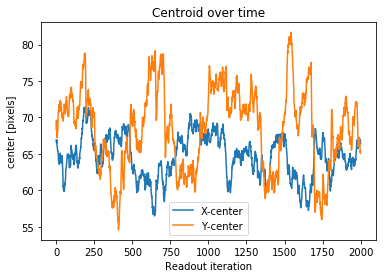

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nb_05.42.12_1372-xycentroid.png")

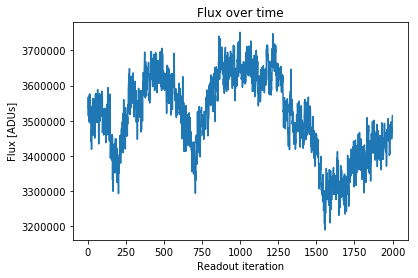

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nb_05.42.12_1372-flux.png")

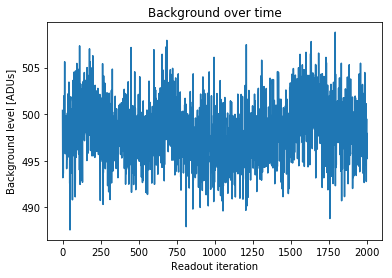

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nb_05.42.12_1372-background.png")

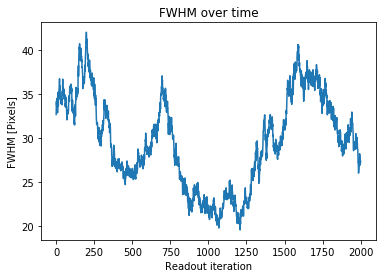

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nb_05.42.12_1372-fwhm.png")

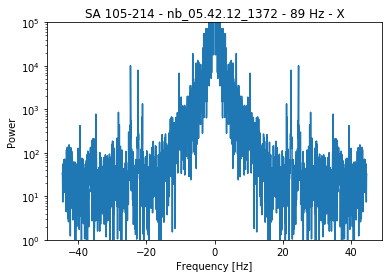

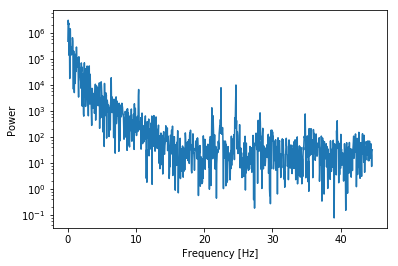

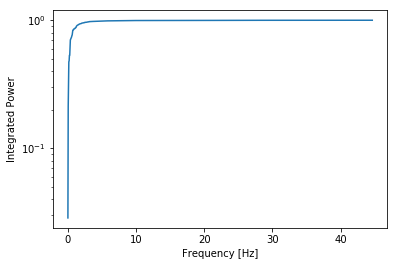

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.011195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.42.12_1372 - 89 Hz - X")
plt.savefig (" nb_05.42.12_1372-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.42.12_1372-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.42.12_1372-integratedpower.png")

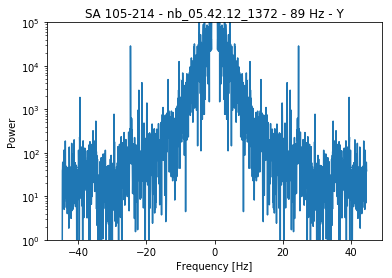

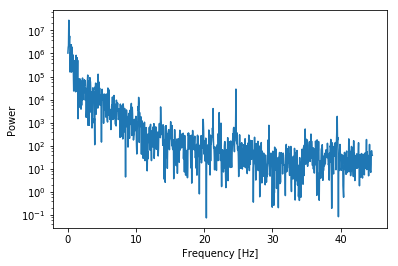

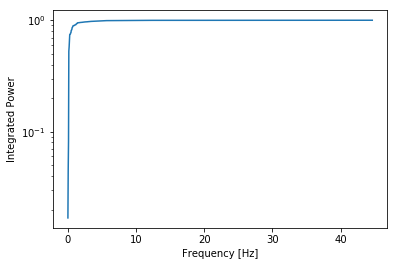

In [8]:
indata = data[1]# - np.mean (data[1])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.011195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.42.12_1372 - 89 Hz - Y")
plt.savefig (" nb_05.42.12_1372-powerspectrum-y.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.42.12_1372-power-y.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.42.12_1372-integratedpower-y.png")